In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Data Analyst\Projects\Data Base\diabetes_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
median_thickness = df['SkinThickness'].median()
mean_thickness = df['SkinThickness'].mean()
print("Median Skin Thickness:", median_thickness)
print("Mean Skin Thickness:", mean_thickness)

Median Skin Thickness: 23.0
Mean Skin Thickness: 20.536458333333332


In [8]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df['num_zeros'] = df.eq(0).sum(axis=1)
df['num_nulls'] = df.isnull().sum(axis=1)
threshold = 5
high_missing_rows = df[df['num_zeros'] + df['num_nulls'] > threshold]

print(high_missing_rows)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
426            0       94              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  num_zeros  num_nulls  
426                     0.256   25        0          6          0  


In [10]:
mean_glucose = df['Glucose'].mean()
median_bp = df['BloodPressure'].median()
median_thickness = df['SkinThickness'].median()
median_insulin = df['Insulin'].median()
median_bmi = df['BMI'].median()

print("Mean Glucose:", mean_glucose)
print("Median Blood Pressure:", median_bp)
print("Median Skin Thickness:", median_thickness)
print("Median Insulins:", median_insulin)
print("Median BMI:", median_bmi)


Mean Glucose: 120.89453125
Median Blood Pressure: 72.0
Median Skin Thickness: 23.0
Median Insulins: 30.5
Median BMI: 32.0


In [11]:
df['Glucose'] = df['Glucose'].replace(0, mean_glucose)
df['BloodPressure'] = df['BloodPressure'].replace(0, median_bp)
df['SkinThickness'] = df['SkinThickness'].replace(0, median_thickness)
df['Insulin'] = df['Insulin'].replace(0, median_insulin)
df['BMI'] = df['BMI'].replace(0, median_bmi)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0


In [12]:
df['SkinThickness'] = df['SkinThickness'].replace(99, median_thickness)

In [13]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
num_zeros                   111
num_nulls                   768
dtype: int64

<Axes: >

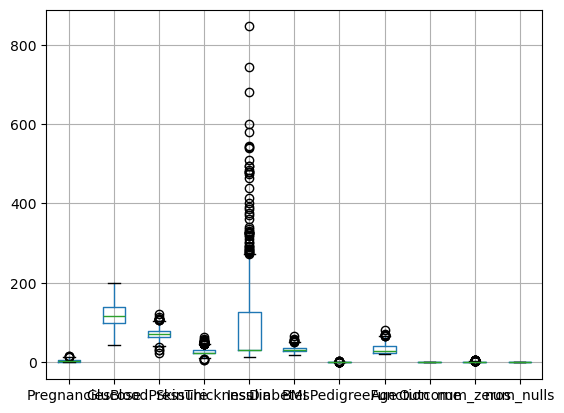

In [14]:
df.boxplot()

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0


In [16]:
df = df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0


In [17]:
mapping = {0: 'No Indicates Diabetes', 1: 'Indicates Diabetes'}
df['CategorieOutcome'] = df['Outcome'].map(mapping)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls,CategorieOutcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0,Indicates Diabetes
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0,No Indicates Diabetes
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0,Indicates Diabetes
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0,No Indicates Diabetes
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0,Indicates Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0,No Indicates Diabetes
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0,No Indicates Diabetes
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0,No Indicates Diabetes
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0,Indicates Diabetes


In [18]:
bmi_mapping = {
    bmi: 'Underweight' if bmi < 18.5 else 
         'Normal' if 18.5 <= bmi <= 25 else 
         'Overweight'
    for bmi in df['BMI']
}

df['BMI_Category'] = df['BMI'].map(bmi_mapping)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls,CategorieOutcome,BMI_Category
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0,Indicates Diabetes,Overweight
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0,No Indicates Diabetes,Overweight
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0,Indicates Diabetes,Normal
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0,No Indicates Diabetes,Overweight
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0,Indicates Diabetes,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0,No Indicates Diabetes,Overweight
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0,No Indicates Diabetes,Overweight
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0,No Indicates Diabetes,Overweight
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0,Indicates Diabetes,Overweight


In [19]:
df['BMI_Category'].unique()

array(['Overweight', 'Normal', 'Underweight'], dtype=object)

In [20]:
sorted(df['BMI_Category'].unique())

['Normal', 'Overweight', 'Underweight']

In [21]:
age_mapping = {
    age: 'Adults' if age < 50 else 
         'Older Adults'
    for age in df['Age']
}

df['Age_Category'] = df['Age'].map(age_mapping)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls,CategorieOutcome,BMI_Category,Age_Category
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0,Indicates Diabetes,Overweight,Older Adults
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0,No Indicates Diabetes,Overweight,Adults
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0,Indicates Diabetes,Normal,Adults
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0,No Indicates Diabetes,Overweight,Adults
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0,Indicates Diabetes,Overweight,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0,No Indicates Diabetes,Overweight,Older Adults
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0,No Indicates Diabetes,Overweight,Adults
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0,No Indicates Diabetes,Overweight,Adults
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0,Indicates Diabetes,Overweight,Adults


In [22]:
def categorize_skin_thickness(age, thickness):
    if age < 50:
        if thickness < 10:
            return 'Under'
        elif thickness <= 25:
            return 'Normal'
        else:
            return 'Over'
    else:
        if thickness < 15:
            return 'Under'
        elif thickness <= 30:
            return 'Normal'
        else:
            return 'Over'

df['SkinThicknessCategory'] = df.apply(lambda row: categorize_skin_thickness(row['Age'], row['SkinThickness']), axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls,CategorieOutcome,BMI_Category,Age_Category,SkinThicknessCategory
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0,Indicates Diabetes,Overweight,Older Adults,Over
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0,No Indicates Diabetes,Overweight,Adults,Over
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0,Indicates Diabetes,Normal,Adults,Normal
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0,No Indicates Diabetes,Overweight,Adults,Normal
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0,Indicates Diabetes,Overweight,Adults,Over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0,No Indicates Diabetes,Overweight,Older Adults,Over
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0,No Indicates Diabetes,Overweight,Adults,Over
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0,No Indicates Diabetes,Overweight,Adults,Normal
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0,Indicates Diabetes,Overweight,Adults,Normal


In [23]:
bp_mapping = {
    bp: 'Normal' if bp < 80 else 
         'High'
    for bp in df['BloodPressure']
}

df['BloodPressure_Category'] = df['BloodPressure'].map(bp_mapping)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls,CategorieOutcome,BMI_Category,Age_Category,SkinThicknessCategory,BloodPressure_Category
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0,Indicates Diabetes,Overweight,Older Adults,Over,Normal
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0,No Indicates Diabetes,Overweight,Adults,Over,Normal
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0,Indicates Diabetes,Normal,Adults,Normal,Normal
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0,Indicates Diabetes,Overweight,Adults,Over,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0,No Indicates Diabetes,Overweight,Older Adults,Over,Normal
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0,No Indicates Diabetes,Overweight,Adults,Over,Normal
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0,Indicates Diabetes,Overweight,Adults,Normal,Normal


In [24]:
glucose_mapping = {
    glucose: 'Normal' if glucose < 140 else 
         'High'
    for glucose in df['Glucose']
}

df['Glucose_Category'] = df['Glucose'].map(glucose_mapping)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,num_zeros,num_nulls,CategorieOutcome,BMI_Category,Age_Category,SkinThicknessCategory,BloodPressure_Category,Glucose_Category
0,6,148.0,72,35,30.5,33.6,0.627,50,1,1,0,Indicates Diabetes,Overweight,Older Adults,Over,Normal,High
1,1,85.0,66,29,30.5,26.6,0.351,31,0,2,0,No Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
2,8,183.0,64,23,30.5,23.3,0.672,32,1,2,0,Indicates Diabetes,Normal,Adults,Normal,Normal,High
3,1,89.0,66,23,94.0,28.1,0.167,21,0,1,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal
4,0,137.0,40,35,168.0,43.1,2.288,33,1,1,0,Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,1,0,No Indicates Diabetes,Overweight,Older Adults,Over,Normal,Normal
764,2,122.0,70,27,30.5,36.8,0.340,27,0,2,0,No Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
765,5,121.0,72,23,112.0,26.2,0.245,30,0,1,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal
766,1,126.0,60,23,30.5,30.1,0.349,47,1,2,0,Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   num_zeros                 768 non-null    int64  
 10  num_nulls                 768 non-null    int64  
 11  CategorieOutcome          768 non-null    object 
 12  BMI_Category              768 non-null    object 
 13  Age_Category              768 non-null    object 
 14  SkinThickn

In [99]:
df = df.drop(columns = 'num_nulls')
df = df.drop(columns = 'num_zeros')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CategorieOutcome,BMI_Category,Age_Category,SkinThicknessCategory,BloodPressure_Category,Glucose_Category
0,6,148.0,72,35,30.5,33.6,0.627,50,1,Indicates Diabetes,Overweight,Older Adults,Over,Normal,High
1,1,85.0,66,29,30.5,26.6,0.351,31,0,No Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
2,8,183.0,64,23,30.5,23.3,0.672,32,1,Indicates Diabetes,Normal,Adults,Normal,Normal,High
3,1,89.0,66,23,94.0,28.1,0.167,21,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal
4,0,137.0,40,35,168.0,43.1,2.288,33,1,Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,No Indicates Diabetes,Overweight,Older Adults,Over,Normal,Normal
764,2,122.0,70,27,30.5,36.8,0.340,27,0,No Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
765,5,121.0,72,23,112.0,26.2,0.245,30,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal
766,1,126.0,60,23,30.5,30.1,0.349,47,1,Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal


In [101]:
df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208615,0.040050,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.218623,0.151870,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208615,0.218623,1.000000,0.156178,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.040050,0.151870,0.156178,1.000000,0.254917,0.566096,0.145457,0.029436,0.181681
Insulin,-0.055697,0.357081,-0.028721,0.254917,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281132,0.566096,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.145457,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.324915,0.029436,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.165723,0.181681,0.148457,0.312249,0.173844,0.238356,1.000000


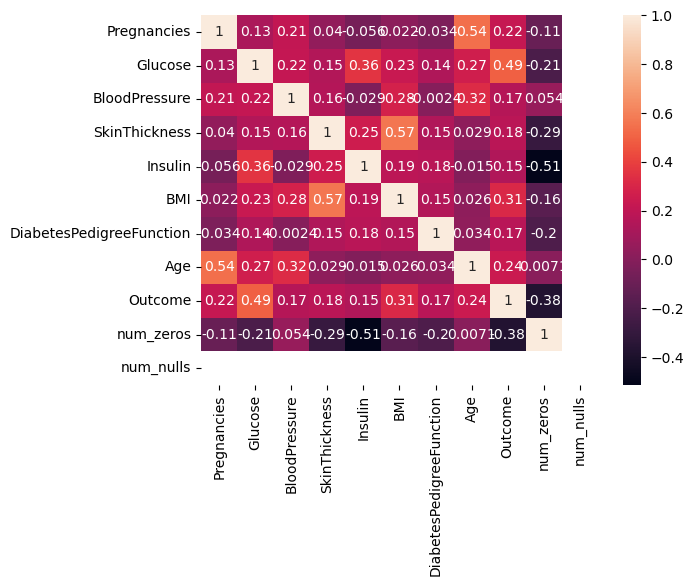

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot= True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [28]:
category_counts = df['BMI_Category'].value_counts()

print(category_counts)

BMI_Category
Overweight     656
Normal         108
Underweight      4
Name: count, dtype: int64


In [29]:
min_thickness = df['SkinThickness'].min()
max_thickness = df['SkinThickness'].max()

print("Minimum Skin Thickness:", min_thickness)
print("Maximum Skin Thickness:", max_thickness)

Minimum Skin Thickness: 7
Maximum Skin Thickness: 63


In [30]:
pd.set_option('display.max_row', 10)

In [31]:
pd.set_option('display.max_column', 30)

In [103]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CategorieOutcome,BMI_Category,Age_Category,SkinThicknessCategory,BloodPressure_Category,Glucose_Category
0,6,148.0,72,35,30.5,33.6,0.627,50,1,Indicates Diabetes,Overweight,Older Adults,Over,Normal,High
1,1,85.0,66,29,30.5,26.6,0.351,31,0,No Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
2,8,183.0,64,23,30.5,23.3,0.672,32,1,Indicates Diabetes,Normal,Adults,Normal,Normal,High
3,1,89.0,66,23,94.0,28.1,0.167,21,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal
4,0,137.0,40,35,168.0,43.1,2.288,33,1,Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0,No Indicates Diabetes,Overweight,Older Adults,Over,Normal,Normal
764,2,122.0,70,27,30.5,36.8,0.340,27,0,No Indicates Diabetes,Overweight,Adults,Over,Normal,Normal
765,5,121.0,72,23,112.0,26.2,0.245,30,0,No Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal
766,1,126.0,60,23,30.5,30.1,0.349,47,1,Indicates Diabetes,Overweight,Adults,Normal,Normal,Normal


In [33]:
df.to_csv(r"D:\Data Analyst\Projects\Data Base\diabetes_dataset_fix.csv", index = False)

In [105]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'CategorieOutcome',
       'BMI_Category', 'Age_Category', 'SkinThicknessCategory',
       'BloodPressure_Category', 'Glucose_Category'],
      dtype='object')